In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
import matplotlib.pyplot as plt

In [ ]:
# Load dataset
df = pd.read_csv("C:/Users/SOUVIK/Downloads/bank_additional_full.csv")

In [3]:
# Convert target to binary
df['y'] = df['y'].map({'yes':1, 'no':0})

In [4]:
# Select features and target
features = ['age','job','marital','education','default','housing','loan',
            'contact','month','day_of_week','campaign','pdays','previous',
            'poutcome','emp.var.rate','cons.price.idx','cons.conf.idx',
            'euribor3m','nr.employed']
X = df[features]
y = df['y']

In [5]:
# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

In [6]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,stratify=y,random_state=42)

In [7]:
# Train decision tree
clf = DecisionTreeClassifier(max_depth=5, random_state=1)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=1)

In [8]:
# Predict and evaluate
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:,1]
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))
print(classification_report(y_test, y_pred))

Accuracy: 0.5
ROC AUC: 0.5
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



C:\Users\KOUSHIK\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\KOUSHIK\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\KOUSHIK\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [9]:
# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[1 0]
 [1 0]]


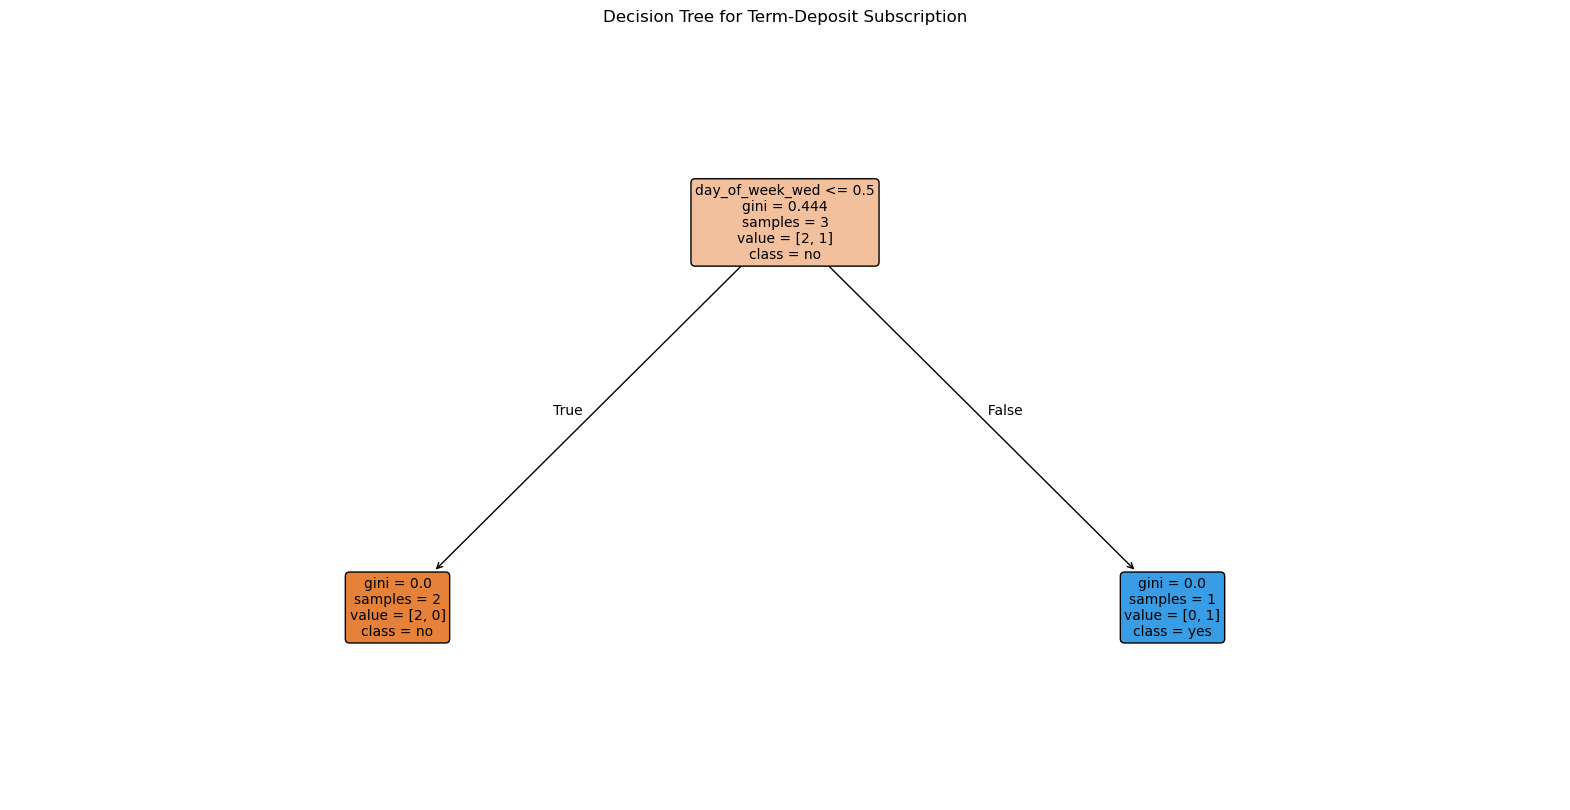

In [10]:
# Plot the tree
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=['no','yes'],
          filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree for Term-Deposit Subscription")
plt.show()
